In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans # k-mean clustering
from scipy.cluster.hierarchy import dendrogram, linkage # Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

### K-means clustering

In [8]:
# Generate two clusters by random numbers shifted from each other
np.random.seed(2)

#Draw samples from a standard Normal distribution with 50 rows and 2 columns
x = np.random.standard_normal((50, 2)) 

x[:5]

array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737],
       [ 0.50288142, -1.24528809],
       [-1.05795222, -0.90900761]])

<IPython.core.display.Javascript object>


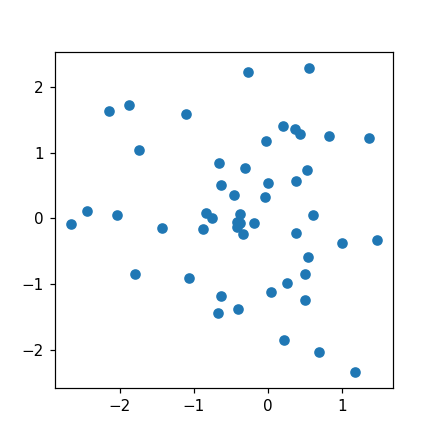

In [14]:
%matplotlib notebook
plt.figure(figsize=(4, 4))
plt.scatter(x[:,0], x[:, 1])

In [15]:
# Now the first 25 observations have a mean shift relative to the next 25 observations
x[0:24, 0] = x[0:24, 0] + 3
x[0:24, 1] = x[0:24, 1] - 4

<IPython.core.display.Javascript object>


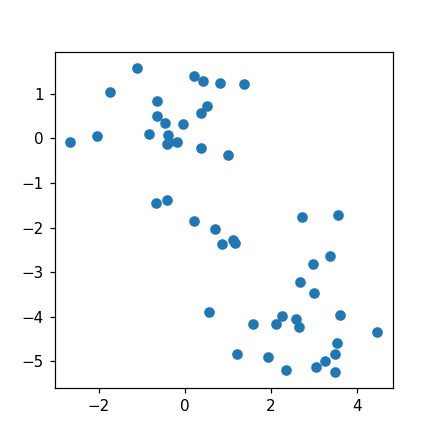

In [16]:
%matplotlib notebook
plt.figure(figsize=(4, 4))
plt.scatter(x[:,0], x[:, 1])

In [20]:
# Kmeans clustering
# n_init: Number of time the k-means algorithm will be run with different 
# centroid seeds. 
cluster = KMeans(n_clusters=2, n_init=20)

# Fit with simulated samples
cluster.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
# find the centers of each clusters
centers = cluster.cluster_centers_
centers

array([[-0.26299088,  0.14466016],
       [ 2.54735187, -3.80398568]])

In [49]:
# The cluster assignments of the 50 observations are contained in labels_
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

<IPython.core.display.Javascript object>


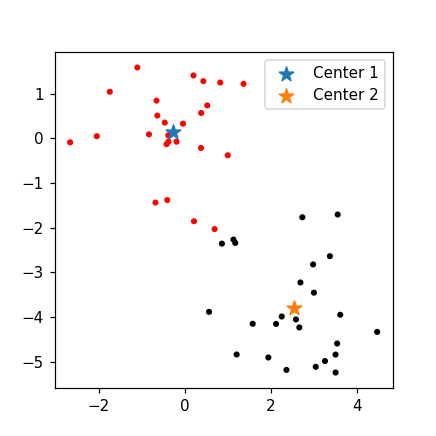

In [48]:
%matplotlib notebook
plt.figure(figsize=(4, 4))
plt.scatter(x[:,0], x[:, 1], c = cluster.labels_, marker = '.', cmap=plt.cm.flag)
plt.scatter(centers[0][0], centers[0, 1], label = 'Center 1', marker = '*', s=100)
plt.scatter(centers[1][0], centers[1, 1], label = 'Center 2', marker = '*', s = 100)
plt.legend()

In [52]:
"""In this example, we knew that there really were two clusters because
we generated the data. However, for real data, in general we do not know
the true number of clusters. We could instead have performed K-means
clustering on this example with K = 3"""

cluster3 = KMeans(n_clusters=3, n_init=20)

# Fit with simulated samples
cluster3.fit(x)

# find the centers of each clusters
centers3 = cluster3.cluster_centers_
centers3

array([[ 2.86091883, -4.12357938],
       [-0.30497332,  0.49202574],
       [ 0.69945422, -2.14934345]])

<IPython.core.display.Javascript object>


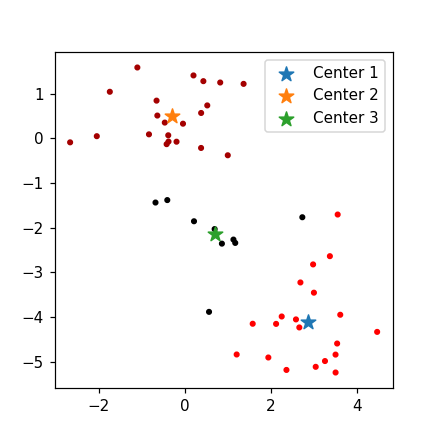

In [53]:
%matplotlib notebook
plt.figure(figsize=(4, 4))
plt.scatter(x[:,0], x[:, 1], c = cluster3.labels_, marker = '.', cmap=plt.cm.flag)
plt.scatter(centers3[0][0], centers3[0, 1], label = 'Center 1', marker = '*', s=100)
plt.scatter(centers3[1][0], centers3[1, 1], label = 'Center 2', marker = '*', s = 100)
plt.scatter(centers3[2][0], centers3[2, 1], label = 'Center 3', marker = '*', s = 100)
plt.legend()

<IPython.core.display.Javascript object>


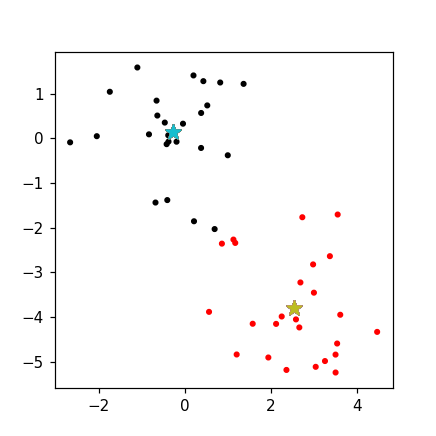

[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[-0.26299088  0.14466016] [ 2.54735187 -3.80398568]
[-0.26299088  0.14466016] [ 2.54735187 -3.80398568]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[-0.26299088  0.14466016] [ 2.54735187 -3.80398568]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[-0.26299088  0.14466016] [ 2.54735187 -3.80398568]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[-0.26299088  0.14466016] [ 2.54735187 -3.80398568]
[-0.26299088  0.14466016] [ 2.54735187 -3.80398568]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[-0.26299088  0.14466016] [ 2.54735187 -3.80398568]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[ 2.54735187 -3.80398568] [-0.26299088  0.14466016]
[ 2.54735187

In [61]:
"""To run the KMeans function with multiple initial cluster assignments,
we use the n_init argument. If a value of n_init greater than one
is used, then K-means clustering will be performed using multiple random
assignments, and the KMeans function will
report only the best results. Here we compare using n_init=1 to n_init=20"""
%matplotlib notebook
plt.figure(figsize=(4, 4))
plt.scatter(x[:,0], x[:, 1], c = cluster.labels_, marker = '.', cmap=plt.cm.flag)

for i in range(1, 21):
    cluster = KMeans(n_clusters=2, n_init=i)

    # Fit with simulated samples
    cluster.fit(x)

    # find the centers of each clusters
    centers = cluster.cluster_centers_
    print(centers[0], centers[1])
    plt.scatter(centers[0][0], centers[0, 1], label = 'Center 1', marker = '*', s=100)
    plt.scatter(centers[1][0], centers[1, 1], label = 'Center 2', marker = '*', s = 100)

### Hierarchical Clustering

In [66]:
"""we use the data from k-means example to plot the hierarchical
clustering dendrogram using complete, single, and average linkage clustering,
with Euclidean distance as the dissimilarity measure. We begin by
clustering observations using complete linkage."""

# this example is just a simple one with no need to perform scaling
# Check your dataset in a real example, you might need scaling.

hc_complete = AgglomerativeClustering(linkage='complete')
hc_complete.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [68]:
# The cluster assignments of the 50 observations are contained in labels_
hc_complete.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>


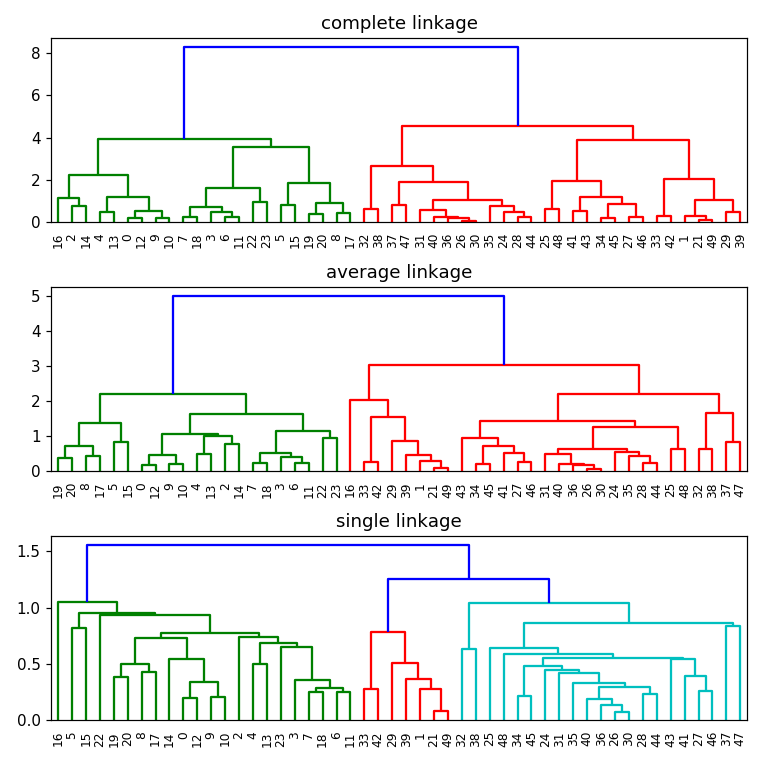

In [84]:
%matplotlib notebook
fig, axe = plt.subplots(3,1, figsize=(7, 7))
i=0
for method in ['complete', 'average', 'single']:
    
    hc = AgglomerativeClustering(linkage=method)
    hc.fit(x)
    linked = linkage(x, method=method)

    dendrogram(linked, ax=axe[i],
                orientation='top',
                #labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True)
    axe[i].set_title(method +' linkage')
    i+=1
plt.tight_layout();